In [ ]:
pip install opencv.python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path= "/content/drive/MyDrive/WASTE CLASSIFICATION/DATASET/TRAIN"
test_path="/content/drive/MyDrive/WASTE CLASSIFICATION/DATASET/TEST"


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
#visualization
x_data=[]
y_data=[]
for category in glob(train_path + '/*'):
    # Iterate through each file in the category
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        if img_array is not None:  # Check if the image was successfully read
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Corrected constant
            x_data.append(img_array)
            y_data.append(category.split('/')[-1])  # Extract category name
        else:
            print(f"Error reading image: {file}")

# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

0it [00:00, ?it/s]
100%|██████████| 1270/1270 [00:33<00:00, 38.40it/s] 


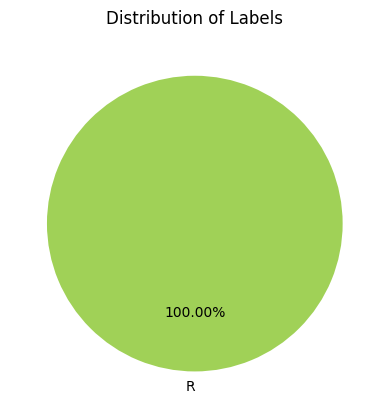

In [ ]:
import matplotlib.pyplot as plt


colors = ['#a0d157', '#c48bb8']


value_counts = data.label.value_counts()
labels = value_counts.index.tolist()

plt.pie(
    value_counts,
    labels=labels,
    autopct='%0.2f%%',
    colors=colors[:len(labels)],
    startangle=90,
    explode=[0.05] * len(labels)
)


plt.title("Distribution of Labels")
plt.show()
